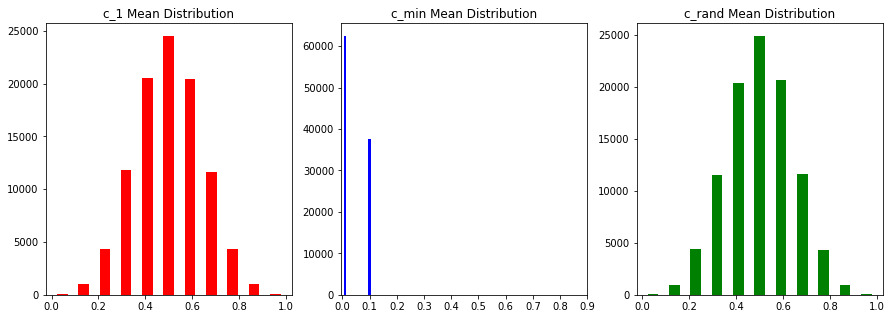

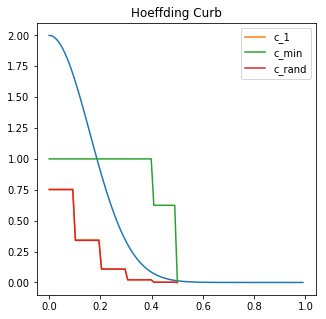

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import math

# create one row with 3 columns, each to contain a histogram
fig, axs = plt.subplots(1, 3, figsize=[15, 5])

coins = 1000
flipsPerCoin = 10
samples = 99999

# 3 different empty arrays of size 100000 for histogram
firstArray = np.empty([99999])
minArray = np.empty([99999])
randomArray = np.empty([99999])

for i in range(99999):
    # data is ndarray dimensions 1000 row 10 columns
    data = np.random.binomial(size=coins*flipsPerCoin, n=1, p=0.5)
    data = data.reshape(1000, 10)

    # Get the indices of 3 coins
    firstIndex = np.sum(data[0])
    randomIndex = np.random.choice(coins)
    flipSumArray = np.sum(data, axis = 1)
    minIndex = np.argmin(flipSumArray)
    
    firstArray[i] = np.sum(data[0, :]) / 10.0
    minArray[i] = np.sum(data[minIndex, :]) / 10.0
    randomArray[i] = np.sum(data[randomIndex, :]) / 10.0

n1, bins1, patches1 = axs[0].hist(firstArray, 11, facecolor="red", rwidth=0.5)
n2, bins2, patches2 = axs[1].hist(minArray, 11, facecolor="blue", rwidth=0.5)
n3, bins3, patches3 = axs[2].hist(randomArray, 11, facecolor="green", rwidth=0.5)

axs[0].set_title("c_1 Mean Distribution")
axs[1].set_title("c_min Mean Distribution")
axs[1].xaxis.set_ticks(np.arange(0, 1, 0.1))
axs[2].set_title("c_rand Mean Distribution")

eps = np.empty(100)
hoeff = np.empty(100)

for x in range(100):
    eps[x] = x/100
    hoeff[x] = 2.0 * np.exp(-2 * np.power(eps[x], 2) * flipsPerCoin)

fig, ax = plt.subplots(1, 1, figsize=[5, 5])
    
ax.plot(eps, hoeff)
ax.set_title("Hoeffding Curve")

y = lambda epsilon: 2.0*np.exp(-2*flipsPerCoin*epsilon**2)

def prob(nu, epsilon, samples):
    xabs = np.abs(np.asarray(nu) - 0.5)
    return np.sum(np.greater(xabs, epsilon))/float(samples)

x = np.linspace(0.0, 0.5, 50)

#c_1 probability plotting
probs1 = np.array([prob(firstArray, x_, samples) for x_ in x])
ax.plot(x, probs1, label="c_1")

#c_min probability plotting
probs2 = np.array([prob(minArray, x_, samples) for x_ in x])
ax.plot(x, probs2, label="c_min")

#c_rand probability plotting
probs3 = np.array([prob(randomArray, x_, samples) for x_ in x])
ax.plot(x, probs3, label="c_rand")

plt.legend()
plt.show()

a. What is u for the coins? 

- 0.5

b. Repeat this entire experiment a large number of times (e.g., 100,000 runs of the entire experiment) to get several instances of v1, vrand, and vmin and plot the histograms of the distributions of v1, vrand and vmin. Notice that which coins end up being crand and cmin may differ from one run to another.

- Result above

c. Using (b), plot estimates for P[|v - u]| > epsilon] as a function of epsilon, together with the Hoeffding bound 2e^-2e^2 N (on the same graph).

d. Which coins obey the Hoeffding bound, and which ones do not? Explain why.

- The c_1 and c_rand coins obey the Hoeffding Bound, and the c_min does not. The reason why c_min does not is because c_min differs from the u (0.5) too drastically, thus violating the Hoeffding bound. C_1 and c_rand both stay under the scoped area of the Hoeffding bound.

e. Explain how the model described here relates to the bin model described in the book and the lecture.

- The model here relates to the bin model in the book in a lot of ways. Both of these models use Hoeffding Inequality to compute if the probability is obeyed.